# Midterm Project

## Author: Joshua Ryal

## What is the average number of jumps needed to reach Linus Torvalds on Github?

### Approach 1: Traversing utilizing users through GitHub's follow system

[['nypzxy', 'lkee6760', 'Trinea', 'torvalds']]


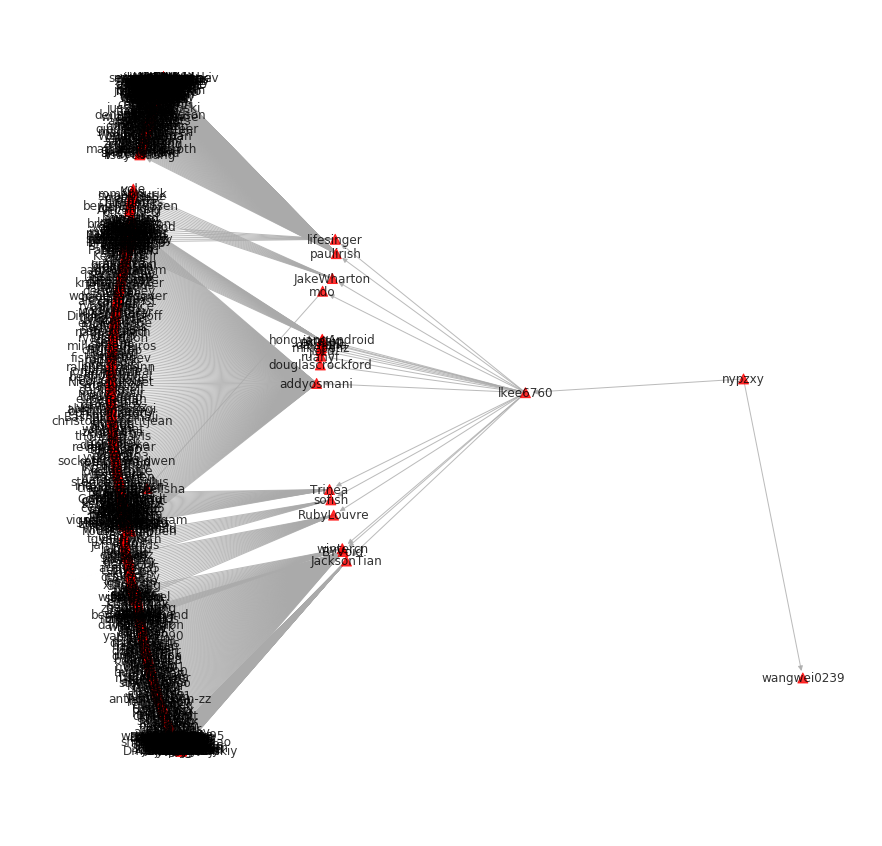

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import degrees_modules
import warnings
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

graph = nx.read_gpickle('graph3.pkl')


''' Code used to generate the stored graph
#Continuously branch out using followers until torvalds is found
def useFollowers(userSet):
    foundTorvalds = False
    while foundTorvalds is False:
        for user in userSet:
            if user.following < 11000:
                userSet |= (degrees_modules.addFollowing(gitGraph, user))
            print('still alive after user ' + str(user))
            if gitGraph.has_node('torvalds') is True:
                foundTorvalds = True
                break
'''

#Print the path taken to find Torvalds
print([p for p in nx.all_shortest_paths(graph,'nypzxy','torvalds')])

#Convert the graph into a tree using a breadth first search
tree = nx.bfs_tree(graph, 'nypzxy', 5)

#Print the resulting graph
labels = {n:n for n in tree.nodes()}
nx.draw(tree, nx.kamada_kawai_layout(tree), arrows=True, ax=ax,
        node_size=100, edge_color='#aaaaaa', 
        node_color=degrees_modules.colorGraph(graph), alpha=0.8, 
        font_size=12, labels = labels, node_shape='^')

Traversing by users results in reaching Torvalds in very few jumps, averaging between 3-4. This can be explained by the approximate 90,000 followers Torvalds has on GitHub. With every follower being a point of access, there are many different pages that can lead to Torvalds.

### Approach 2: Traversing using repositories and stargazers

In [ ]:
def useGazers(userSet):
    foundTorvalds = False
    while foundTorvalds is False:
        for user in userSet:
            repos = degrees_modules.addStars(gitGraph, user)
            for repo in repos:
                userSet |= degrees_modules.addStargazers(gitGraph, repo)
            if gitGraph.has_node('torvalds') is True:
                foundTorvalds = True
                break

Attempting to reach torvalds in this manner is so inefficient that it trips the github pagination limit as shown from the error log below

In [ ]:
GithubException: 422 {'message': 'In order to keep the API fast for everyone, pagination is limited for this resource. Check the rel=last link relation in the Link response header to see how far back you can traverse.', 'documentation_url': 'https://developer.github.com/v3/#pagination'}

The inefficiency of this method can be explained by looking at Torvalds' GitHub page. There are only 2 repositories that he has starred, Linux and Subsurface, meaning there are only two pages that can lead to torvalds. Approaching the repo spread through owned repositories wouldn't increase the chance much either, as Torvalds only owns 6 repositories.